In [102]:
import re
import collections
import pandas as pd

In [39]:
emails = pd.read_csv('data/email_base.csv', sep='\t', names=['email'])
emails.head()

,email
0,e4534d1765b9868ee69560d22d4fbe
1,a6c00bcbc7@yandex.ru
2,a4cc52d0de@gmail.com
3,acbc8faa1c@gmail.com
4,70a1f9be47@yandex.ru


In [131]:
pattern = re.compile(r'([\w\.-]+\@([\w]+)(\.{1}\w{2,3}))')
#pattern = re.compile(r'([\w\.-]+)@([\w]+(\.ru|\.com))')

In [115]:
if re.match(pattern, 'username-1990@gmail.com'):
    print(True)
else:
    print(False)

True


In [84]:
#то, что стоит в первых скобках
print(re.search(pattern, 'username@yandex.ru').group(1))
#то, что стоит во вторых скобках
print(re.search(pattern, 'username@yandex.ru').group(2))
# то, что стоит во внутренних скобках
print(re.search(pattern, 'username@yandex.ru').group(3))


username@yandex.ru
yandex.ru
.ru


In [85]:
def get_email_domain(row):
    if re.match(pattern, row['email']):
        return re.search(pattern, row['email']).group(2)
    else:
        return 'wrong email'

In [90]:
emails['domain'] = emails.apply(get_email_domain, axis=1)
emails.head()

,email,domain
0,e4534d1765b9868ee69560d22d4fbe,wrong email
1,a6c00bcbc7@yandex.ru,yandex.ru
2,a4cc52d0de@gmail.com,gmail.com
3,acbc8faa1c@gmail.com,gmail.com
4,70a1f9be47@yandex.ru,yandex.ru


<AxesSubplot:>

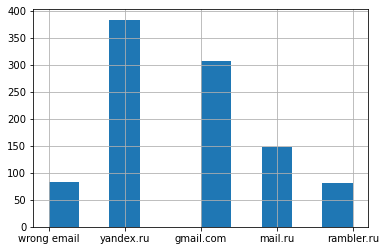

In [91]:
%matplotlib inline
emails['domain'].hist()

In [104]:
counter = 0
domains = emails['domain']
for row in domains:
    if row == 'wrong email':
        counter += 1
print(counter)

82


In [123]:
text = 'Андрей Марков страхование markov_chains@yandex.ru. Мария Кюри технологии mary_decay@gmail.com Петр Капица онлайн-образование study-hard@rambler.ru'

In [132]:
re.findall(pattern, text)

[('markov_chains@yandex.ru', 'yandex', '.ru'),
 ('mary_decay@gmail.com', 'gmail', '.com'),
 ('study-hard@rambler.ru', 'rambler', '.ru')]

In [130]:
for email in re.findall(pattern, text):
    print(email[0])

markov_chains@yandex.ru
mary_decay@gmail.com
study-hard@rambler.ru
